# **How to Drive a Car with a Camera [Part 1: The ALV]**


[jupytertheme](https://github.com/dunovank/jupyter-themes) for this talk: 

```
jt -t grade3 -cellw=90% -fs=20 -tfs=2- -ofs=20
```

![](../videos/rb_scatter_two.gif)

# Here's some data! Any guesses what we're looking at?

![](../graphics/dividing_line_medium-01.png)

# It's a video of a road!
<br />

- As you may know, each pixel in a typical digital color image is represented by a red, green, and blue value. In the scatter plot, we're plotting each pixel according to its red (x-axis) and blue (y-axis) value. 
- **But why, Stephen?**
- Well, this scatter plot is how one the earliest autonomous vehicles, the Autonomous Land Vehicle, saw the world. 

![](../videos/scatter_to_image.gif)

![](graphics/spacer_small-01.png)

# A little about the Autonomous Land Vehicle (ALV)

<br />
- Funded by the US Goverment's \$1B **Strategic Computing Initiative (SCI)** (1983-1993)
- SCI Funded research into advances into computer hardware + AI, specifically focused on military applications
- In August 1984 defense contractor Martin Marietta was awarded a \$10.6M 42 month contract to develop the ALV, assisted by Univerity of Maryland and the Hughes Artifical Intelligence Labratory
- I think the strategic computing logo is cool AF, and would pay between 20 and 40 USD for a t-shirt with this logo


![title](../graphics/sci_overview-01.png)

![](graphics/spacer_small-01.png)

# So, What Would You Do?

<br />

- First ALV Demonstration was scheduled for May 1985 (9 months after contract was awarded!) 
- The vehicle was to move slowly on a mostly straight section of road for 1 km
- Working on a compressed timeline, Martin Marietta quickly assembled the ALV, the first version included:
    - A single color video camera (480x512 resolution)
    - A VICOM image processor 
    - Several Intel single-board computers (SBCs)
    - Primary computer was based on the [Intel 80286 processor](https://en.wikipedia.org/wiki/Intel_80286) (~10 MHz, ~1-2 MIPS)
- To drive a 15,200 lb vehicle down a road, you probably need to know like, where the road is
- **So, how should we figure out where the road is?**
    - Which pixels be road?

![](../videos/rgb_numbers.gif)

- And let's not forget that we're dealing with **alot** of data, and limited computational power in the 1980s
- It's easy to forget how fast + accurate our visual cortex is
- The visual above is downsampled to (33, 60, 3), the ALV camera was (480, 512, 3)!

In [1]:
#Math!
(480*512*3*30)/1e6

22.1184

- (480x512x3) images @ 30 fps = **22 MB/s** of data from the camera
- Unless you have 1000Mbs fiber, that's probably faster than your internet connection **today**.
    - The only reason you can watch YouTube is becuase video compression is fucking amazing.
    - Your visual cortex is way faster than your internet.

![](graphics/spacer_small-01.png)

# How Do We Turn this Firehose of Numbers into **Semantic Meaning**?

![](../videos/rgb_img_and_hist_no_pause.gif)

- What mathematics could we use here to identify the road pixels?
    - Without requiring too much computation
- What patterns in our data could we exploit?
- Let's look at something the ALV team tried:

![](graphics/spacer_small-01.png)

# What would happen if we **subtracted** one channel from another?

- What would say, the red channel minus the blue channel look like?

![title](../graphics/question_one-01.png)

![](../graphics/spacer_small-01.png)

---

![](../videos/rgb_difference_img_and_hist.gif)

# **Ok, Who Cares?**

- Is this manipluation be useful?
- Well, the Red-Blue image does seem to  enhance the road! That could be useful - why does this happen?
- What does it **mean** to subtract one color channel from another?
- Let's have a look at a paper from the Autonomous Land Vehicle Team
- [VITS - A Vision System for Autonomous Land Vehicle Navigation](http://www.cs.ucsb.edu/~mturk/Papers/ALV.pdf); Matthew Turk, David Morgenthaler, Keight Gremban, and Martin Marra
    - [Fun Fact] Following the ALV, Matthew Turk went to the MIT Media Lab to work on the know well-known eigenfaces project

![title](../graphics/VITS.png)

- The authors generalize the R-B huerisitic based operation using the equation below
- $\langle R, G, B\rangle$ is red, green, and blue image values
- $\langle r, g, b\rangle$ is the *tricolor* operation - the amount of red, green, and blue channel to blend together
- I is the single band "feature enhanced" image


$$I(i, j)= rR(i, j) + gG(i, j) + bB(i, j)$$
$$
= \langle r, g, b\rangle \cdot \langle R, G, B \rangle
$$


- One way to think of this operation is as a weighted average of our three channels
- What would our image look like for $\langle r, g, b\rangle = \langle 1, 1, 1\rangle$?
- Our red minus blue trick is a special case $\langle r, g, b\rangle = \langle 1, 0, -1\rangle$ of a dot product in the **color space** of the image!
- This means that there's a **geometric interpretation** of subtracting out color channels. 
    - Hype the shit out of that.
- Let's try to get a feel for the **color space** of our images.

![](../videos/rotating_scatter_2.gif)


$$I(i, j)= rR(i, j) + gG(i, j) + bB(i, j) = \langle r, g, b\rangle \cdot \langle R, G, B \rangle
$$


- So, we have a sense for our pixel $\langle R, G, B \rangle$ values in RGB colorspace, but what about our "tri-color" operation $\langle r, g, b \rangle$? What does this look like in our colorspace?
     - Remember that $\langle r, g, b \rangle$ represents a weighted average of our color channels
     - And we can represent our red mius blue operation as $\langle r, g, b\rangle = \langle 1, 0, -1\rangle$

# Which Vector Represents Red Minus Blue?

![](../videos/rotating_vectors.gif)

![](../graphics/spacer_small-01.png)

- So we can interpret our pixels values and our weighted average as vectors in RGB space!
- Ok, now let's look at our data our red minus blue operation together!
    - We'll borrow another idea from the VITS authors and simplify things a bit by just looking at the Red/Blue projection of our full 3D colorspace

![](../videos/projection_video.gif)

- Now, here's where it gets interesting! Geometrically, as you may know, we can think of the dot product as projecting one vector onto another. 
    - This is mathematically true when the vector we're projecting "on to" is a unit vector, otherwise it's true with a scaling factor
- So subtracting our blue from red channels is equivalent to projecting our image onto the red minus blue vector in colorspace
- **This helps us find the road here (and for the ALV 30 years ago) becuase out the road and non-road colors are maximally* different in this direction of colorspace!**
- The way to say this like a human is that the road is redder than the non-road. 
- Dot product definition in euclidean space:

$$
\langle r, g, b\rangle \cdot \langle R, G, B \rangle = \rvert \rvert \langle r, g, b\rangle \rvert \rvert \; \rvert \rvert\langle R, G, B \rangle \rvert \rvert \; cos(\theta)
$$

- Where $\langle r, g, b\rangle$ is our vector representing the weighting assigned to our 3 channels, $\langle R, G, B \rangle $ is the vector respresenting each pixel in RGB colorspace, and $\theta$ is the angle between vectors.

![](../graphics/spacer_small-01.png)

## **...And Threshold**
- Now that we've projected our image into a space where the road and non-road are (hopefully) maximally different, we can find our road pixels with a simple threshold!
- Here's the whole system, represented in equation (3) in the VITS paper:

$$
I'(i, j)=
\begin{cases}
1 & if \quad rR(i, j) + gG(i,j) + bB(i, j) + \lambda < 0 \\
0 & otherwise.
\end{cases}
$$

- And written as a python method 30 years later:
    - In one line of code :)
    - We're going to make one minor change and flip the <, the road on the Martin Marrieta test site was more blue and less red surrounding dirt - we have the opposite situation in our data.

In [1]:
def alv_vision(image, rgb, thresh):
    '''
    Apply the basic color-based road segmentation algorithm used in 
    the autonomous land vehicle. 
    Args
    image: color input image, dimension (n,m,3)
    rgb: tri-color operation values, dimension (3)
    thresh: threshold value for road segmentation
    
    Returns
    mask: binary mask of the size (n, m), ones indicate road, zeros indicate non-road
    '''
    return (np.dot(image.reshape(-1, 3), rgb) > thresh).reshape(image.shape[0], image.shape[1])

### Let's import an image and try it out!

In [3]:
%pylab inline
import os
from moviepy.editor import *
from ipywidgets import interact

import cv2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


Import driving video using awesome moviepy library

In [6]:
clip = VideoFileClip('../videos/dirt_road.mp4')

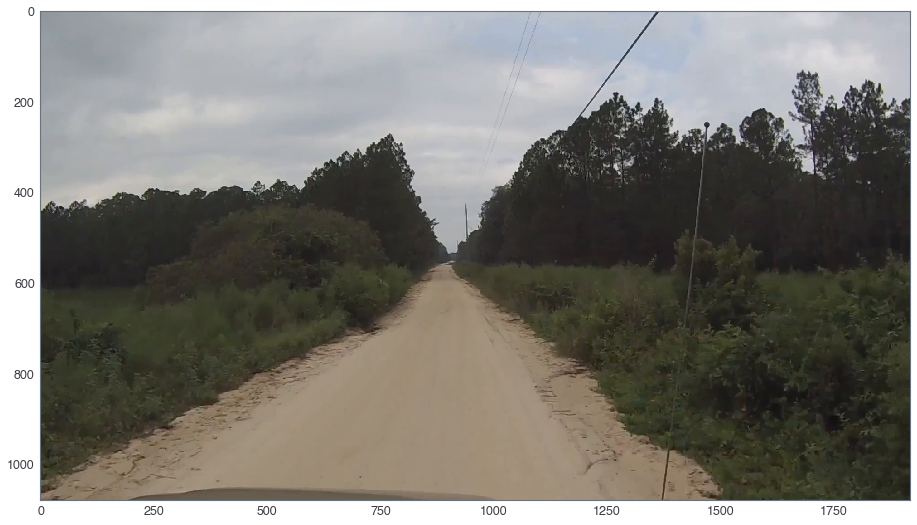

In [8]:
t = 5.0
im = clip.get_frame(t)
fig = figure(0, (18,9))
imshow(im); grid(0);

Alright, let's apply our ALV vision algorithm to our data!

In [9]:
def apply_alv_vision(t, thresh):
    #Grab image
    im = clip.get_frame(t)
    
    #Run alv vision algorithm
    mask = alv_vision(im, rgb = [1, 0, -1], thresh = thresh)
    
    #Display mask on grayscale version of original image
    im_gray = np.tile(np.expand_dims(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY), axis=2), (1, 1, 3))
    
    #Shade road pixels
    im_gray[:,:,1][mask] = 0.5*im_gray[:,:,1][mask] + 255*0.5
    im_gray[:,:,2][mask] = 0.5*im_gray[:,:,2][mask] + 255*0.5
    
    #Show image
    fig = figure(0, (18, 9))
    imshow(im_gray); grid(0);

- Time for some tuning!

In [11]:
interact(apply_alv_vision, t = (0, 10), thresh = (-64, 64))

interactive(children=(IntSlider(value=5, description='t', max=10), IntSlider(value=0, description='thresh', ma…

<function __main__.apply_alv_vision(t, thresh)>

![](../graphics/spacer_small-01.png)

### Ok, pretty good, let's see the whole system in action!

![](../graphics/spacer_small-01.png)

![](../videos/project_and_threshold.gif)

- This is how the early Autonomous Land Vehicle saw the world. 
- The ALV engineers would typically choose the tricolor operation values before a run by visualizng the red blue scatter plot (in the vehicle!) and setting the rb values to best seperate the road and non-road clusters. They later implemented an adaptive method to find good rgb values.
- Early ALV algorithms used a constant threshold $\lambda$ value, later iterations sampled the road surface to heuristically tune $\lambda$ as the ALV drove.
- Road boundaries would be fit to the road pixel detections, projected into world space, and this information was used to steer the vehicle.
- This engineering solution resulted in a successful May 1985 demo, and further improvements led to more successful demos over the next few years
- The ALV drove the 1016 meter long course at an average speed of 2 mph at the May 1985 demo
    - This may sound slow, but it was 100 times faster than any autonomous vehicle had traveled before!



![](graphics/spacer_small-01.png)

# **Now, what could (possibly) go wrong?**

![](graphics/spacer_small-01.png)

- So, we've seen how one of the earliest autonomous vehicles, the ALV saw the world. 
- Now, as you may have guessed, while this was a good engineering solution for the problem at hand, this is not how modern autonomous cars find the road. 
- But why not? Where could this technique fail?

![](../videos/alv_failures.gif)

### <center>"With four parameters I can fit an elephant, and with five I can make him wiggle his trunk."</center>

<div style="text-align: right">- John von Neumann </div>

- So where could this technique fail?
    - Pretty much anywhere it wasn't tuned for, or where we don't have sufficient color difference between the raod + non-road. 
- Our brains our really good at tuning out ton of factors that dramatically change the the image, such as:
    - Shadows
    - Variable Illumination: sun position, clouds, reflection
    - Subtle and transitive road boundaries
- I think it's remarkable that with just 4 parameters(r, g, b, and $\lambda$), we can so dramatically overfit to a specific video (and task/demo requirement)
    - I think this tells us something about the inherent complexity of the computer vision problem
   

![](../graphics/alv_team.png)

- And that's a (piece of) how the ALV saw the world. 

- [FUN FACT] By the November 1985 demonstration the ALV had 25-30k lines of code running on 10 different processors. 
    - Which is either impressive or terrifying...
- For practical purposes, the ALV program ended in 1987, 3 years after it began
- Criticized as being too demo-driven, for phase 2 Martin Marietta was to host the vehicle as a "national test bed" - this turned out to be quite expensive, with few researchers taking interest
- **However**, the ALV did kick off a decade of incredible progress in computer vision for autonomous driving. 
- In fact, just a decade later, this happened:

![](../graphics/spacer_small-01.png)

![](../graphics/no-hands-summary-images-01.png)

- Just 10 years later, in the summer of 1995 CMU's Todd Jochem and Dean Pomeraleau drove **2797/2849** miles autonomously (steering only) from Pittsburg, PA to San Diego, CA. 
    - They paid for the trip through some sponsorships, and (no joke) selling t-shirts. 
    - ...seems like the industry may not have been as lucrative back then...
- This is a **huge** increase in capability of the course of a decade!
- At this point in my research, I found myself asking the question:

# How is this possible?

- How do we go from a 15,000 lb machine full of computers with manually-tuned color segmentation that only works on certain roads to driving across 98% of the country is a consumer minivan in 10 years?
- To answer this question, we need to visit Carnegie Mellon in the 1980s